資料預處理

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train_normalize=x_train/255
x_test_normalize=x_test/255

In [5]:
from keras.utils import np_utils
y_train_onehot=np_utils.to_categorical(y_train)
y_test_onehot=np_utils.to_categorical(y_test)

建立模型

In [6]:
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from keras.models import Sequential

In [7]:
model=Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=(5,5),input_shape=(32,32,3),padding='same',activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [9]:
model.add(Flatten())
model.add(Dense(1024,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total par

訓練模型

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
train_history=model.fit(x_train_normalize,y_train_onehot,validation_split=0.2,epochs=10,batch_size=1000,verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/10





 - 53s - loss: 2.4389 - acc: 0.2059 - val_loss: 1.8457 - val_acc: 0.3682
Epoch 2/10
 - 48s - loss: 1.6164 - acc: 0.4281 - val_loss: 1.4927 - val_acc: 0.4912
Epoch 3/10
 - 50s - loss: 1.3542 - acc: 0.5239 - val_loss: 1.3370 - val_acc: 0.5520
Epoch 4/10
 - 50s - loss: 1.1993 - acc: 0.5798 - val_loss: 1.2393 - val_acc: 0.5904
Epoch 5/10
 - 48s - loss: 1.0995 - acc: 0.6161 - val_loss: 1.1602 - val_acc: 0.6081
Epoch 6/10
 - 51s - loss: 1.0242 - acc: 0.6412 - val_loss: 1.1272 - val_acc: 0.6199
Epoch 7/10
 - 49s - loss: 0.9610 - acc: 0.6635 - val_loss: 1.1000 - val_acc: 0.6215
Epoch 8/10
 - 49s - loss: 0.8888 - acc: 0.6896 - val_loss: 1.0608 - val_acc: 0.6422
Epoch 9/10
 - 51s - loss: 0.8249 - acc: 0.7182 - val_loss: 1.0399 - val_acc: 0.6452
Epoch 10/10
 - 55s - loss: 0.7664 - acc: 0.7372 - val_loss: 1.0108 - val_acc: 0.6525


In [16]:
import matplotlib.pyplot as plt
def show_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.xlabel('epochs')
    plt.ylabel(train_acc)
    plt.title('Train History')
    plt.legend(['train','test'])
    plt.show()

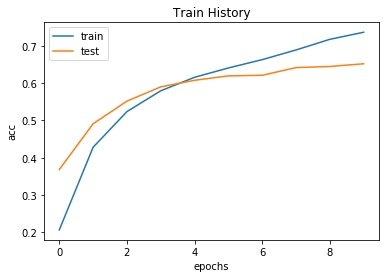

In [17]:
show_history("acc","val_acc")

In [20]:
train_history.history

{'val_loss': [1.8457093954086303,
  1.492723858356476,
  1.3370056986808776,
  1.2393249988555908,
  1.1602094531059266,
  1.127244472503662,
  1.1000437021255494,
  1.0607833981513977,
  1.0399413049221038,
  1.010777759552002],
 'val_acc': [0.3681999981403351,
  0.4912000000476837,
  0.5519999980926513,
  0.5903999984264374,
  0.6080999970436096,
  0.6198999941349029,
  0.6215000033378602,
  0.6421999990940094,
  0.6451999962329864,
  0.6525000035762787],
 'loss': [2.4389331519603727,
  1.6163853347301482,
  1.3541883736848832,
  1.19927878677845,
  1.0994598269462585,
  1.0242164134979248,
  0.9610486477613449,
  0.8887668326497078,
  0.8249276041984558,
  0.7664035320281982],
 'acc': [0.20589999929070474,
  0.4281249985098839,
  0.5238750033080578,
  0.5798499926924705,
  0.6160999968647957,
  0.6412250027060509,
  0.6635499998927117,
  0.6895749971270562,
  0.7181749969720841,
  0.7372000023722649]}

評估模型準確率

In [22]:
score=model.evaluate(x_test_normalize,y_test_onehot)
score

10000/10000 [==============================] - 4s 353us/step


[1.012775367641449, 0.6469]

進行預測

In [24]:
prediction=model.predict_classes(x_test_normalize)
prediction[:10]

array([3, 1, 8, 0, 4, 6, 1, 6, 3, 1], dtype=int64)

In [25]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [34]:
def show_prediction(images,labels,prediction,idx,num):
    fig=plt.gcf()
    fig.set_size_inches(14,16)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap='binary')
        
        title=str(idx+1)+'.'+label_dict[labels[idx][0]]+',prediction='+label_dict[prediction[idx]]
        
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

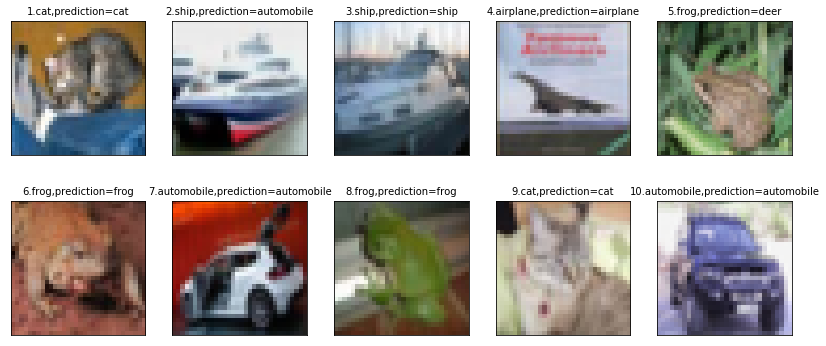

In [53]:
show_prediction(x_test,y_test,prediction,0,10)

查看預測機率

In [41]:
predicted_probability=model.predict(x_test_normalize)

In [43]:
predicted_probability

array([[5.8151037e-03, 2.0546252e-03, 6.3154414e-02, ..., 6.9151553e-03,
        6.4633556e-02, 2.9084436e-03],
       [2.6758121e-02, 5.9284145e-01, 1.6806921e-04, ..., 1.4524433e-05,
        3.6194178e-01, 1.8042898e-02],
       [3.0390462e-01, 6.1693314e-02, 1.2839263e-02, ..., 2.1574510e-02,
        5.1179528e-01, 6.7566432e-02],
       ...,
       [1.1272368e-03, 5.1362884e-05, 3.4580809e-01, ..., 1.5707698e-02,
        9.1313776e-03, 4.5155309e-04],
       [1.1137994e-02, 2.7887008e-01, 4.3058310e-02, ..., 1.7427545e-02,
        6.8211085e-03, 1.1676075e-02],
       [1.2953363e-03, 2.8780943e-03, 7.2582033e-03, ..., 4.0715131e-01,
        1.3881128e-03, 6.3501392e-03]], dtype=float32)

In [60]:
def show_predicted_probability(images,predicted_probability,idx):
    fig=plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(np.reshape(images[idx],(32,32,3)))
    plt.show()
    for i in range(10):
        print(label_dict[i]+' probability:%1.9f'%(predicted_probability[idx][i]))

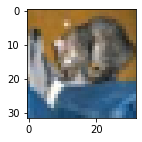

airplane probability:0.005815104
automobile probability:0.002054625
bird probability:0.063154414
cat probability:0.554216862
deer probability:0.038165979
dog probability:0.164686784
frog probability:0.097448967
horse probability:0.006915155
ship probability:0.064633556
truck probability:0.002908444


In [61]:
show_predicted_probability(x_test_normalize,predicted_probability,0)